# Dev eFEL metric

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import efel

### Load Input and Output

In [2]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [3]:
out_traces = df_out_traces.to_numpy()
out_traces = out_traces[:2, 1:]
out_traces

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384]])

In [4]:
inp_traces = df_inp_traces.to_numpy()
inp_traces = inp_traces[:2, 1:]
inp_traces

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

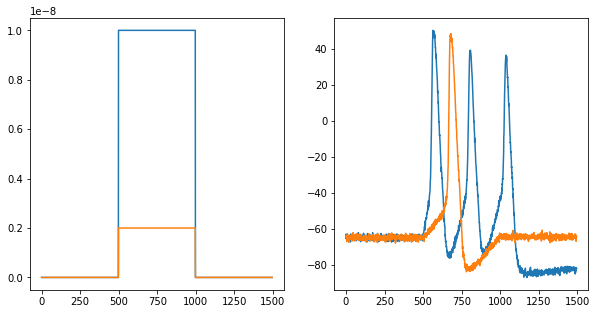

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(inp_traces.transpose());
ax[1].plot(out_traces.transpose());

## eFEL features calc

### Get Traces

In [6]:
time = np.arange(0, len(out_traces[0])/10, 0.1)

In [7]:
trace1 = {}
trace1['T'] = time
trace1['V'] = out_traces[0, :]

In [8]:
trace1['stim_start'] = [50]
trace1['stim_end'] = [100]

In [9]:
traces_times = [[50, 100], [51, 100]]

In [10]:
traces = []
for i, trace in enumerate(out_traces):
    temp_trace = {}
    temp_trace['T'] = time
    temp_trace['V'] = trace
    temp_trace['stim_start'] = [traces_times[i][0]]
    temp_trace['stim_end'] = [traces_times[i][1]]
    traces.append(temp_trace)


In [11]:
traces

[{'T': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.494e+02, 1.495e+02,
         1.496e+02]),
  'V': array([-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
         -82.30107475, -82.04870895]),
  'stim_start': [50],
  'stim_end': [100]},
 {'T': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.494e+02, 1.495e+02,
         1.496e+02]),
  'V': array([-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
         -65.13069593, -64.48718384]),
  'stim_start': [51],
  'stim_end': [100]}]

## Calculate Features

In [18]:
feat_list = ['mean_AP_amplitude', 'voltage_base']

In [19]:
feature_values = efel.getFeatureValues(traces, feat_list)
feature_values

[{'mean_AP_amplitude': array([84.09934389]),
  'voltage_base': array([-65.02022173])},
 {'mean_AP_amplitude': array([85.66269442]),
  'voltage_base': array([-64.91993906])}]

In [20]:
efel.api.getFeatureNames()

['AHP1_depth_from_peak',
 'AHP2_depth_from_peak',
 'AHP_depth',
 'AHP_depth_abs',
 'AHP_depth_abs_slow',
 'AHP_depth_diff',
 'AHP_depth_from_peak',
 'AHP_slow_time',
 'AHP_time_from_peak',
 'AP1_amp',
 'AP1_begin_voltage',
 'AP1_begin_width',
 'AP1_peak',
 'AP1_width',
 'AP2_AP1_begin_width_diff',
 'AP2_AP1_diff',
 'AP2_AP1_peak_diff',
 'AP2_amp',
 'AP2_begin_voltage',
 'AP2_begin_width',
 'AP2_peak',
 'AP2_width',
 'AP_amplitude',
 'AP_amplitude_change',
 'AP_amplitude_diff',
 'AP_amplitude_from_voltagebase',
 'AP_begin_indices',
 'AP_begin_time',
 'AP_begin_voltage',
 'AP_begin_width',
 'AP_duration',
 'AP_duration_change',
 'AP_duration_half_width',
 'AP_duration_half_width_change',
 'AP_end_indices',
 'AP_fall_indices',
 'AP_fall_rate',
 'AP_fall_rate_change',
 'AP_fall_time',
 'AP_height',
 'AP_phaseslope',
 'AP_phaseslope_AIS',
 'AP_rise_indices',
 'AP_rise_rate',
 'AP_rise_rate_change',
 'AP_rise_time',
 'AP_width',
 'APlast_amp',
 'APlast_width',
 'BAC_maximum_voltage',
 'BAC_w

## Change this into a function

In [26]:
traces_times = [[50, 100], [51, 100]]
# fl = ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
#                                                  'AP_begin_voltage', 'mean_frequency']
fl = ['mean_AP_amplitude', 'voltage_base', 'mean_frequency']
out_traces

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384]])

In [27]:
def calculate_features(traces, inp_times, feat_list):
    traces = []
    for i, trace in enumerate(out_traces):
        time = np.arange(0, len(trace)/10, 0.1)
        temp_trace = {}
        temp_trace['T'] = time
        temp_trace['V'] = trace
        temp_trace['stim_start'] = [inp_times[i][0]]
        temp_trace['stim_end'] = [inp_times[i][1]]
        traces.append(temp_trace)

    results = efel.getFeatureValues(traces, feat_list)

    return results

In [28]:
res = calculate_features(out_traces, traces_times, fl)
res

[{'mean_AP_amplitude': array([84.09934389]),
  'voltage_base': array([-65.02022173]),
  'mean_frequency': array([65.1465798])},
 {'mean_AP_amplitude': array([85.66269442]),
  'voltage_base': array([-64.91993906]),
  'mean_frequency': array([58.13953488])}]

## Calculate error

In [29]:
ot_opt = out_traces + np.random.randn()

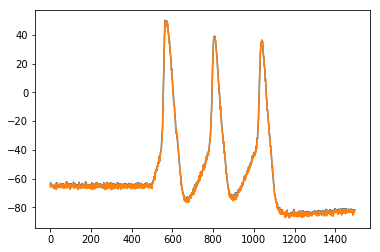

In [30]:
plt.plot(out_traces[0])
plt.plot(ot_opt[0]);

In [31]:
res = calculate_features(out_traces, traces_times, fl)
res

[{'mean_AP_amplitude': array([84.09934389]),
  'voltage_base': array([-65.02022173]),
  'mean_frequency': array([65.1465798])},
 {'mean_AP_amplitude': array([85.66269442]),
  'voltage_base': array([-64.91993906]),
  'mean_frequency': array([58.13953488])}]

In [32]:
res2 = calculate_features(ot_opt, traces_times, fl)
res2

[{'mean_AP_amplitude': array([84.09934389]),
  'voltage_base': array([-65.02022173]),
  'mean_frequency': array([65.1465798])},
 {'mean_AP_amplitude': array([85.66269442]),
  'voltage_base': array([-64.91993906]),
  'mean_frequency': array([58.13953488])}]

In [33]:
d1 = res[0]
d2 = res2[0]
d3 = {key: d1[key] - d2.get(key, 0) for key in d1.keys()}

In [34]:
d3

{'mean_AP_amplitude': array([0.]),
 'voltage_base': array([0.]),
 'mean_frequency': array([0.])}

In [35]:
for k, v in d3.items():
    d3[k] = sum(v)
    

In [36]:
d3

{'mean_AP_amplitude': 0.0, 'voltage_base': 0.0, 'mean_frequency': 0.0}

In [37]:
sum(d3.values())

0.0

In [38]:
err = sum(d3.values())
err

0.0

### Change feat to err

In [39]:
def feat_to_err(d1, d2):
    d3 = {key: d1[key] - d2.get(key, 0) for key in d1.keys()}   
    for k, v in d3.items():
        d3[k] = sum(v)

    err = sum(d3.values())
    return err

In [40]:
feat_to_err(res[0], res2[0])

0.0

In [41]:
feat_to_err(res[1], res2[1])

0.0